In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Drop Kolom (drop kolom yang tidak mempunyai angka, ex: Name, Ticket)

In [3]:
cols_drop = ['Name','Ticket','Cabin']
df = df.drop(cols_drop,axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


# Check Null Values with isnull.sum

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [7]:
df['Embarked'].fillna("S",inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Convert to Binary

In [8]:
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

In [9]:
df = pd.concat((df,EmbarkedColumnDummy,SexColumnDummy),axis=1)

In [10]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,1,0,3,male,22.000000,1,0,7.2500,S,0,0,1,0,1
1,2,1,1,female,38.000000,1,0,71.2833,C,1,0,0,1,0
2,3,1,3,female,26.000000,0,0,7.9250,S,0,0,1,1,0
3,4,1,1,female,35.000000,1,0,53.1000,S,0,0,1,1,0
4,5,0,3,male,35.000000,0,0,8.0500,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S,0,0,1,0,1
887,888,1,1,female,19.000000,0,0,30.0000,S,0,0,1,1,0
888,889,0,3,female,29.699118,1,2,23.4500,S,0,0,1,1,0
889,890,1,1,male,26.000000,0,0,30.0000,C,1,0,0,0,1


# Drop Embarked and Sex (because we have a binary number)

In [11]:
cols_drop2 = ['Embarked','Sex']
df = df.drop(cols_drop2,axis=1)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
C              0
Q              0
S              0
female         0
male           0
dtype: int64

In [13]:
df = df.drop('PassengerId',axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.000000,1,0,7.2500,0,0,1,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0,1,0
2,1,3,26.000000,0,0,7.9250,0,0,1,1,0
3,1,1,35.000000,1,0,53.1000,0,0,1,1,0
4,0,3,35.000000,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,0,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1,1,0
888,0,3,29.699118,1,2,23.4500,0,0,1,1,0
889,1,1,26.000000,0,0,30.0000,1,0,0,0,1


# X and Y variable from data

In [14]:
X = df.drop(['Survived'],axis=1)
Y = df['Survived']
X

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,22.000000,1,0,7.2500,0,0,1,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0
2,3,26.000000,0,0,7.9250,0,0,1,1,0
3,1,35.000000,1,0,53.1000,0,0,1,1,0
4,3,35.000000,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,0,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1,1,0
888,3,29.699118,1,2,23.4500,0,0,1,1,0
889,1,26.000000,0,0,30.0000,1,0,0,0,1


In [15]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Go To Machine Learning

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

# 1. Decision Tree

In [17]:
from sklearn import tree
df_decision_tree = tree.DecisionTreeClassifier(ccp_alpha=0.01)#build
df_decision_tree.fit(X_train,Y_train)#train
df_decision_tree.score(X_test,Y_test)#predict

y_pred = df_decision_tree.predict(X_test)
df_decision_tree.score(X_test,Y_test)

0.8246268656716418

In [18]:
y_pred = df_decision_tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[146,  22],
       [ 25,  75]], dtype=int64)

In [19]:
feature_names = X.columns
feature_names

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'female',
       'male'],
      dtype='object')

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(df_decision_tree, out_file="Decision_Tree_Survived.dot", class_names=["Death","Survived"],
               feature_names=feature_names, impurity=False, filled=True)

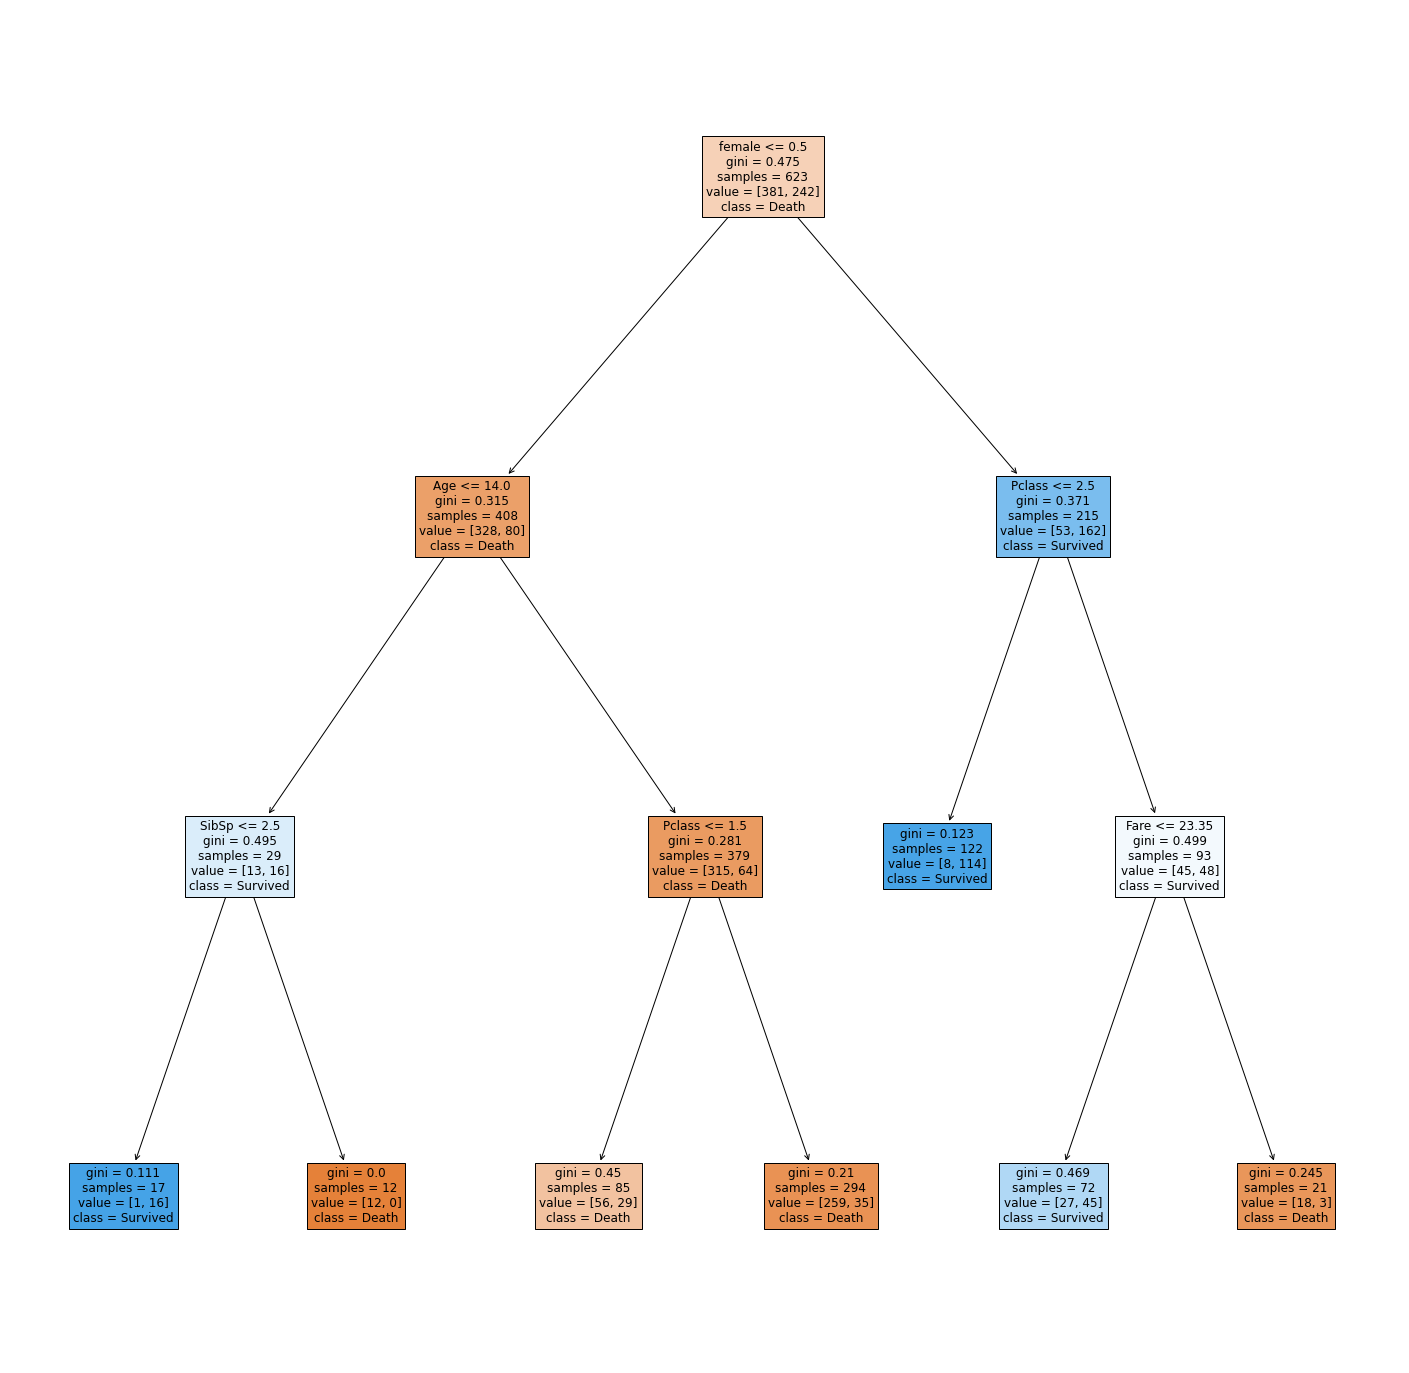

In [21]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure (figsize=(25,25))
_=tree.plot_tree(df_decision_tree, 
                   feature_names= feature_names,
                  class_names={0: 'Death',1: 'Survived'},
                   filled=True,
                   fontsize=12)

# Example Prediction Survived or Not Survived

In [22]:
input_data = (1,15,1,0,7,0,0,1,1,0)

#input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape data as predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = df_decision_tree.predict(input_data_reshaped)
prediction

if (prediction[0]==1):
    print('Survived')
else:
    print('Death')

Survived


C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
df_decision_tree.predict([[1,15,1,0,7,0,0,1,1,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# 2. Random Forest

In [24]:
from sklearn import ensemble
R_forest = ensemble.RandomForestClassifier(n_estimators=100)
R_forest.fit(X_train,Y_train)
R_forest.score(X_test,Y_test)

0.8134328358208955

In [25]:
y_pred = R_forest.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[145,  23],
       [ 27,  73]], dtype=int64)

# Prediction Random Forest

In [26]:
input_data = (1,15,1,0,7,0,0,1,1,0)

#input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape data as predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = R_forest.predict(input_data_reshaped)
prediction

if (prediction[0]==1):
    print('Survived')
else:
    print('Death')

Survived


C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# 3. Gradient Boosting

In [27]:
Grad_B = ensemble.GradientBoostingClassifier()
Grad_B.fit(X_train,Y_train)
Grad_B.score(X_test,Y_test)

0.8432835820895522

# Prediction Gradient Boosting

In [28]:
input_data = (1,15,1,0,7,0,0,1,1,0)

#input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape data as predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = Grad_B.predict(input_data_reshaped)
prediction

if (prediction[0]==1):
    print('Survived')
else:
    print('Death')

Survived


C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


# 4. Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
Naive_B = GaussianNB()
Naive_B.fit(X_train,Y_train)
Naive_B.score(X_test,Y_test)

0.7873134328358209

In [30]:
y_pred = Naive_B.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[135,  33],
       [ 24,  76]], dtype=int64)

# 5. K-Nearest Neighbor

In [31]:
from sklearn.neighbors import KNeighborsClassifier
K_Nearest_N = KNeighborsClassifier(n_neighbors=3)
K_Nearest_N.fit(X_train,Y_train)
K_Nearest_N.score(X_test,Y_test)

0.6902985074626866

In [32]:
y_pred = K_Nearest_N.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[136,  32],
       [ 51,  49]], dtype=int64)

# 6. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
Logistic_R = LogisticRegression()
Logistic_R.fit(X_train,Y_train)
Logistic_R.score(X_test,Y_test)

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7947761194029851

In [34]:
y_pred = Logistic_R.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[141,  27],
       [ 28,  72]], dtype=int64)

# 7. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
Supp_V = SVC(probability=True, kernel='linear')
Supp_V.fit(X_train,Y_train)
Supp_V.score(X_test,Y_test)

In [ ]:
y_pred = Supp_V.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)